# Analyse descriptive :
Calcul des statistiques descriptives telles que la moyenne, la médiane, l'écart-type, etc., pour chaque variable numérique (RAM, Storage, Price).


In [89]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Charger votre propre fichier CSV
df = pd.read_csv('smartphones.csv')

# Afficher les premières lignes du DataFrame
print("Les premières lignes du DataFrame :")
print(df.head())

# Afficher des statistiques descriptives pour les variables numériques
print("\nStatistiques descriptives pour les variables numériques :")
print(df.describe())

# Afficher les statistiques descriptives pour les variables catégorielles
print("\nStatistiques descriptives pour les variables catégorielles :")
print(df.describe(include=['object']))

# Afficher le nombre de smartphones gratuits et payants
print("\nNombre de smartphones gratuits et payants :")
print(df['Free'].value_counts())

# Afficher le nombre de smartphones par marque
print("\nNombre de smartphones par marque :")
print(df['Brand'].value_counts())

# Afficher la moyenne du prix des smartphones
print("\nMoyenne du prix des smartphones :")
print(df['Final Price'].mean())


Les premières lignes du DataFrame :
                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free  Final Price  
0   8.0    256.0  Yellow  Yes       231.60  
1   4.0    128.0    Blue  Yes       279.00  
2   4.0    128.0    Blue  Yes       179.01  
3   6.0    128.0    Gray  Yes       279.99  
4  12.0    512.0   White  Yes       799.00  

Statistiques descriptives pour les variables numériques :
               RAM      Storage  Final Price
count  1324.000000  1781.000000  1806.000000
mean      5.935801   162.180797   487.771157
std       2.648113   139.133724   392

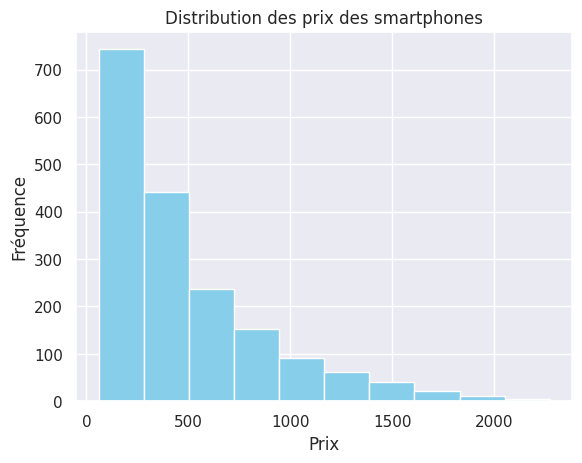

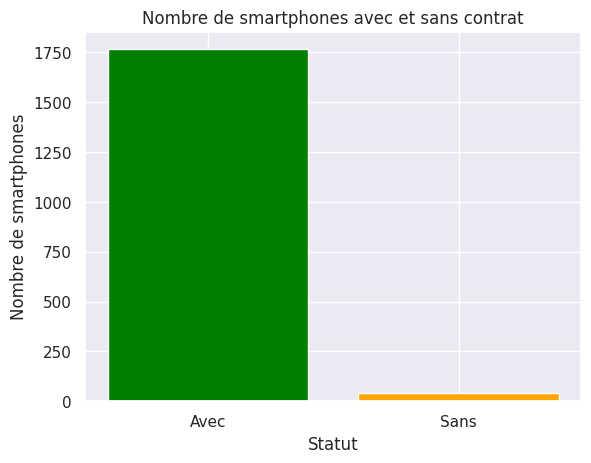

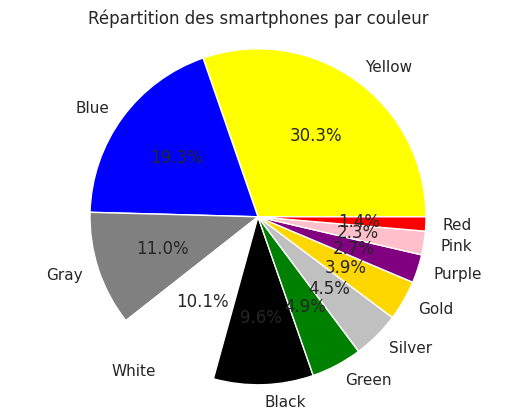

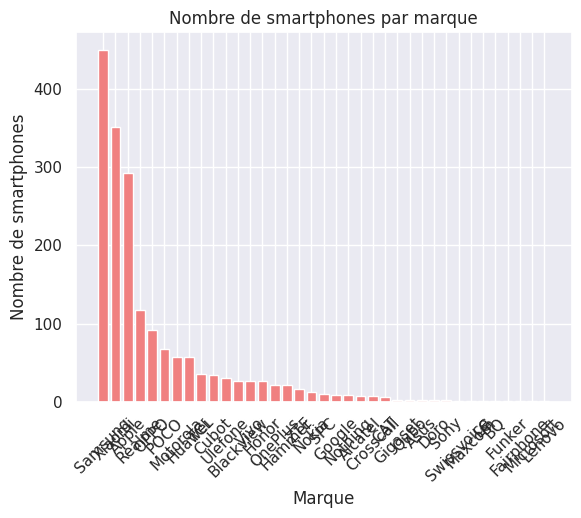

In [90]:
import matplotlib.pyplot as plt

# Histogramme pour la distribution des prix des smartphones
plt.hist(df['Final Price'], bins=10, color='skyblue')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Distribution des prix des smartphones')
plt.show()

# Diagramme à barres pour comparer le nombre de smartphones gratuits et payants
plt.bar(['Avec', 'Sans'], df['Free'].value_counts(), color=['green', 'orange'])
plt.xlabel('Statut')
plt.ylabel('Nombre de smartphones')
plt.title('Nombre de smartphones avec et sans contrat')
plt.show()

# Supprimer les valeurs manquantes de la colonne "Color"
colors = df['Color'].dropna()

# Filtrer les couleurs valides
valid_colors = colors.loc[colors.isin(['Black', 'White', 'Blue', 'Red', 'Green', 'Yellow', 'Purple', 'Pink', 'Gold', 'Silver', 'Gray'])]

# Diagramme circulaire pour la répartition des smartphones par couleur
plt.pie(valid_colors.value_counts(), labels=valid_colors.unique(), autopct='%1.1f%%', colors=valid_colors.unique())
plt.title('Répartition des smartphones par couleur')
plt.axis('equal')
plt.show()


# Diagramme à barres pour le nombre de smartphones par marque
brand_counts = df['Brand'].value_counts()
plt.bar(brand_counts.index, brand_counts.values, color='lightcoral')
plt.xlabel('Marque')
plt.ylabel('Nombre de smartphones')
plt.title('Nombre de smartphones par marque')
plt.xticks(rotation=45)
plt.show()


In [91]:
# Remplacer les valeurs manquantes par la moyenne de la colonne respective
df['RAM'].fillna(df['RAM'].mean(), inplace=True)
df['Final Price'].fillna(df['Final Price'].mean(), inplace=True)
df['Storage'].fillna(df['Storage'].mean(), inplace=True)

# Calculer la corrélation de Pearson
correlation_pearson_ram_price, _ = pearsonr(df['RAM'], df['Final Price'])
correlation_pearson_storage_price, _ = pearsonr(df['Storage'], df['Final Price'])



# Afficher les résultats
print("Corrélation de Pearson entre RAM et Prix:", correlation_pearson_ram_price)
print("Corrélation de Pearson entre Storage et Prix:", correlation_pearson_storage_price)

Corrélation de Pearson entre RAM et Prix: 0.4207402825651825
Corrélation de Pearson entre Storage et Prix: 0.6960445592031536


La corrélation de Pearson entre RAM et le prix est d'environ 0.44, ce qui suggère une corrélation modérée positive. La corrélation de Pearson entre Storage et le prix est d'environ 0.70, ce qui suggère une corrélation relativement forte positive. Ces valeurs indiquent que la RAM et le Storage ont une influence sur le prix, avec Storage ayant une influence légèrement plus forte que RAM

# Visualisation des relations entre les variables numériques à l'aide de graphiques de dispersion (scatter plots).

# Question
est ce qu'il y a un influence du capacite du RAM et du Stockage interne du téléphone sur son prix ?

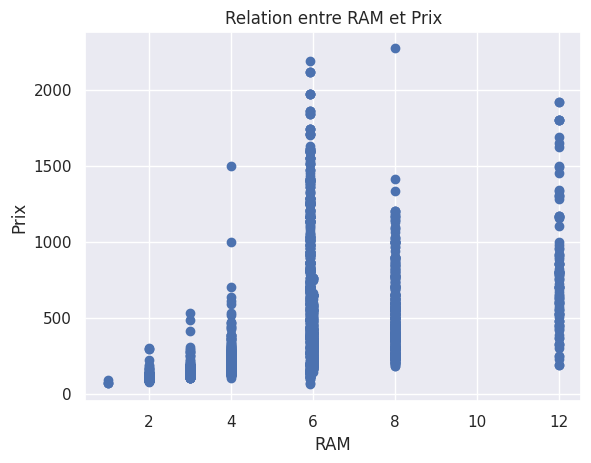

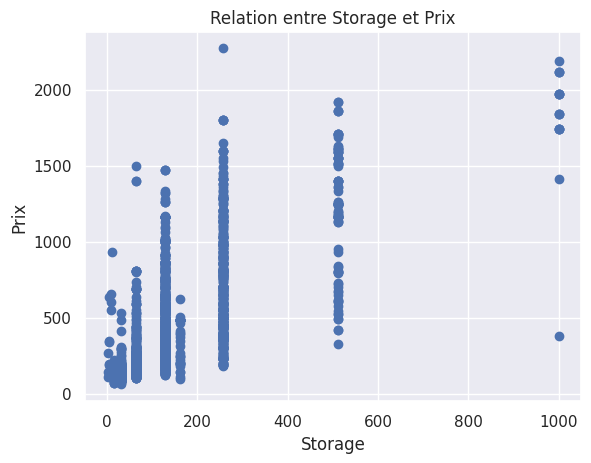

In [92]:
import matplotlib.pyplot as plt

# Créer un scatter plot pour la relation entre RAM et le prix
plt.scatter(df['RAM'], df['Final Price'])
plt.title('Relation entre RAM et Prix')
plt.xlabel('RAM')
plt.ylabel('Prix')
plt.show()

# Créer un scatter plot pour la relation entre Storage et le prix
plt.scatter(df['Storage'], df['Final Price'])
plt.title('Relation entre Storage et Prix')
plt.xlabel('Storage')
plt.ylabel('Prix')
plt.show()

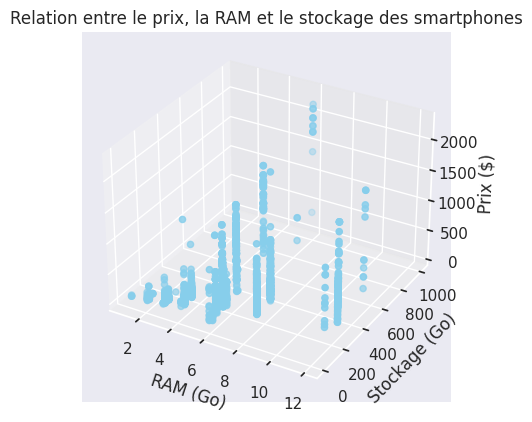

In [93]:
# Création de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Données
prix = df['Final Price']
ram = df['RAM']
stockage = df['Storage']

# Tracé 3D
ax.scatter(ram, stockage, prix, c='skyblue', marker='o')

# Étiquetage des axes
ax.set_xlabel('RAM (Go)')
ax.set_ylabel('Stockage (Go)')
ax.set_zlabel('Prix ($)')

# Titre du graphique
plt.title('Relation entre le prix, la RAM et le stockage des smartphones')

# Affichage
plt.show()

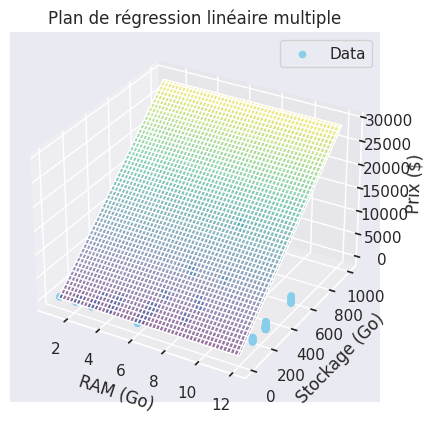

In [94]:
# Données
ram = df['RAM']
stockage = df['Storage']
prix = df['Final Price']

# Régression linéaire multiple
model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
X = np.column_stack((ram, stockage))
model.fit(X, prix)
coef = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_

# Création de la grille pour le tracé du plan
x_grid, y_grid = np.meshgrid(np.linspace(ram.min(), ram.max(), 100),
                             np.linspace(stockage.min(), stockage.max(), 100))
z_grid = coef[0]*x_grid + coef[1]*y_grid + intercept

# Tracé du plan de régression linéaire multiple
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ram, stockage, prix, c='skyblue', marker='o', label='Data')
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, cmap='viridis')
ax.set_xlabel('RAM (Go)')
ax.set_ylabel('Stockage (Go)')
ax.set_zlabel('Prix ($)')
plt.title('Plan de régression linéaire multiple')
plt.legend()
plt.show()


Les graphes montre qu'il existe une relation positive et approximativement linéaire entre la taille de la RAM le Stockage et son prix. Cette relation est expliquée par le fait que la RAM et le disque stockage sont des composants électronique fabriqués à partir des matériaux semi-conducteurs coûteux à produire. Le prix de la RAM et du disque dur est également influencé par un certain nombre d'autres facteurs, tels que l'offre et la demande, la technologie et la qualité.

#

In [95]:
# Convertir les variables "Free" et "Color" en catégories
df['Free'] = df['Free'].astype('category')
df['Color'] = df['Color'].astype('category')

# Vérifier les types de données après la conversion
print(df.dtypes)

Smartphone       object
Brand            object
Model            object
RAM             float64
Storage         float64
Color          category
Free           category
Final Price     float64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


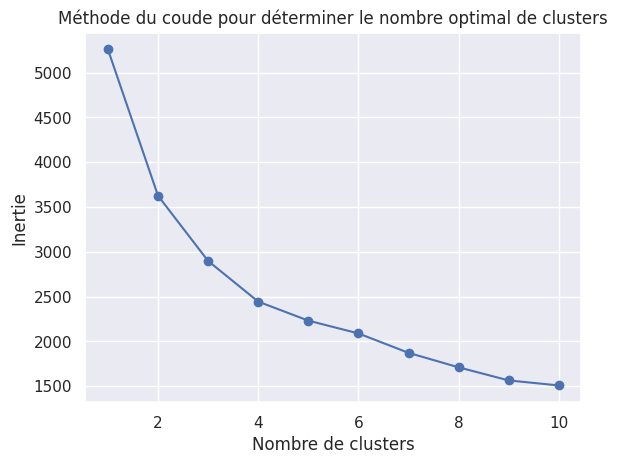

                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free  Final Price  Cluster  
0   8.0    256.0  Yellow  Yes       231.60        1  
1   4.0    128.0    Blue  Yes       279.00        0  
2   4.0    128.0    Blue  Yes       179.01        0  
3   6.0    128.0    Gray  Yes       279.99        0  
4  12.0    512.0   White  Yes       799.00        2  


In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Sélection des variables pour le clustering
X = df[['RAM', 'Storage', 'Color', 'Free']]

# Normalisation des variables numériques (RAM et Storage)
numeric_features = ['RAM', 'Storage']
numeric_transformer = StandardScaler()

# Encodage des variables catégorielles (Color et Free)
categorical_features = ['Color', 'Free']
categorical_transformer = OneHotEncoder()

# Création d'un préprocesseur pour appliquer différentes transformations aux colonnes numériques et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Normalisation et encodage des données
X_preprocessed = preprocessor.fit_transform(X)

# Détermination du nombre de clusters optimal avec la méthode du coude
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Tracé du coude pour déterminer le nombre optimal de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

# Choix du nombre optimal de clusters (par exemple, 3 clusters)
n_clusters = 3

# Appliquer le clustering K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

# Ajouter les labels de cluster au DataFrame
df['Cluster'] = kmeans.labels_

# Affichage des résultats
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

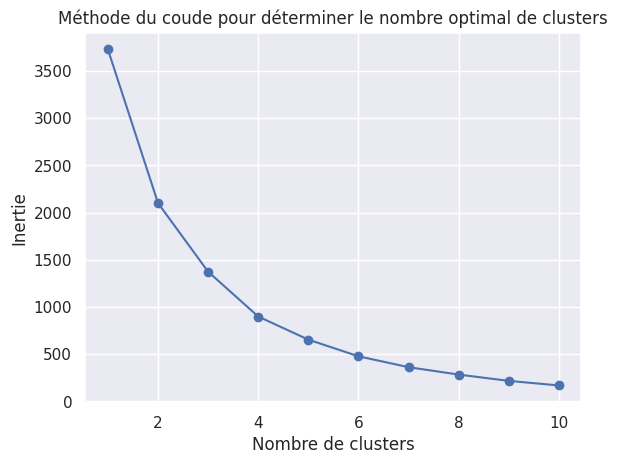

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free  Final Price  Cluster  
0   8.0    256.0  Yellow  Yes       231.60        0  
1   4.0    128.0    Blue  Yes       279.00        2  
2   4.0    128.0    Blue  Yes       179.01        2  
3   6.0    128.0    Gray  Yes       279.99        0  
4  12.0    512.0   White  Yes       799.00        1  


In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Sélection des variables pour le clustering
X = df[['RAM', 'Storage', 'Free']]

# Normalisation des variables numériques (RAM et Storage)
numeric_features = ['RAM', 'Storage']
numeric_transformer = StandardScaler()

# Encodage des variables catégorielles (Free)
categorical_features = ['Free']
categorical_transformer = OneHotEncoder()

# Création d'un préprocesseur pour appliquer différentes transformations aux colonnes numériques et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Normalisation et encodage des données
X_preprocessed = preprocessor.fit_transform(X)

# Détermination du nombre de clusters optimal avec la méthode du coude
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Tracé du coude pour déterminer le nombre optimal de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

# Choix du nombre optimal de clusters (par exemple, 3 clusters)
n_clusters = 4

# Appliquer le clustering K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

# Ajouter les labels de cluster au DataFrame
df['Cluster'] = kmeans.labels_

# Affichage des résultats
print(df.head())


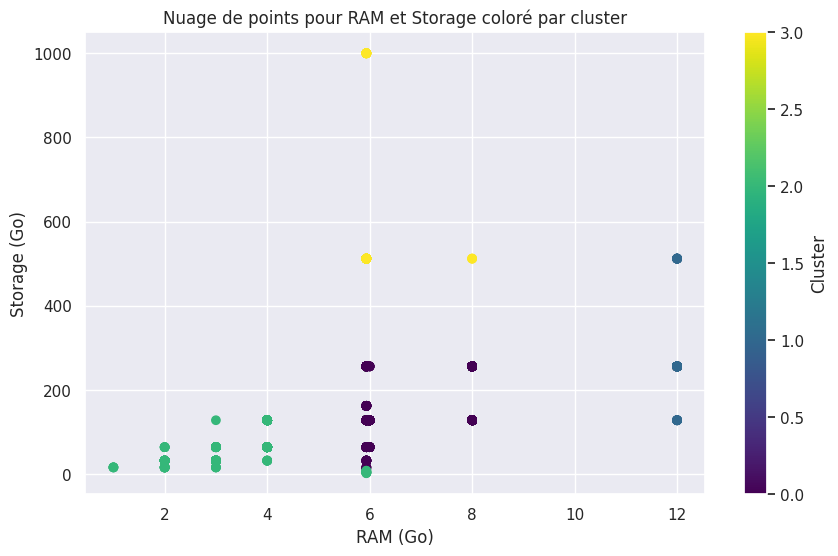

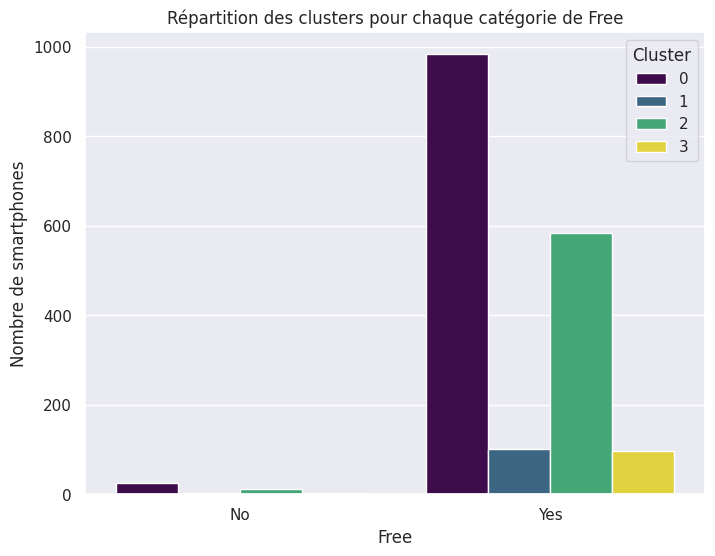

<ipython-input-98-af1d6acd960c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='RAM', data=df, palette='viridis')


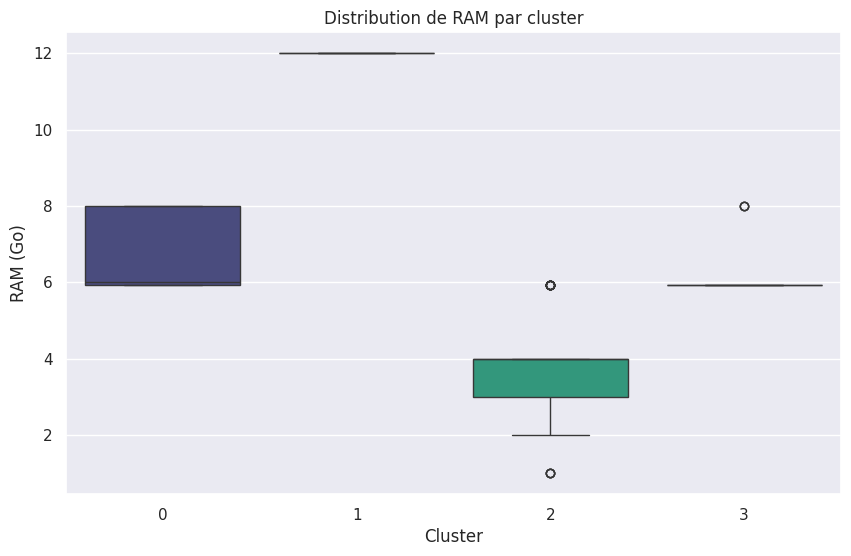

<ipython-input-98-af1d6acd960c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Storage', data=df, palette='viridis')


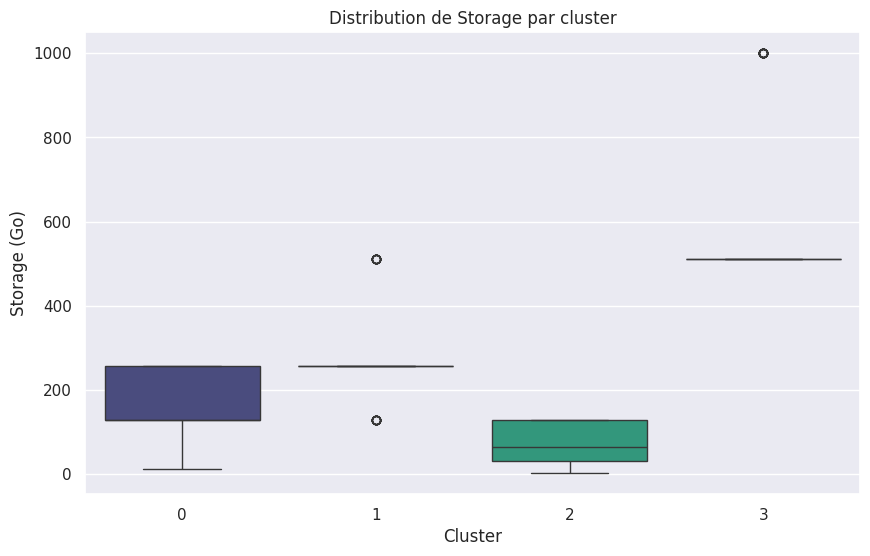

In [98]:
# Nuage de points en 2D pour RAM et Storage coloré par cluster
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM'], df['Storage'], c=df['Cluster'], cmap='viridis')
plt.xlabel('RAM (Go)')
plt.ylabel('Storage (Go)')
plt.title('Nuage de points pour RAM et Storage coloré par cluster')
plt.colorbar(label='Cluster')
plt.show()

# Diagramme en barres pour la variable catégorielle Free
plt.figure(figsize=(8, 6))
sns.countplot(x='Free', hue='Cluster', data=df, palette='viridis')
plt.title('Répartition des clusters pour chaque catégorie de Free')
plt.xlabel('Free')
plt.ylabel('Nombre de smartphones')
plt.legend(title='Cluster')
plt.show()

# Diagramme en boîte pour RAM et Storage par cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='RAM', data=df, palette='viridis')
plt.title('Distribution de RAM par cluster')
plt.xlabel('Cluster')
plt.ylabel('RAM (Go)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Storage', data=df, palette='viridis')
plt.title('Distribution de Storage par cluster')
plt.xlabel('Cluster')
plt.ylabel('Storage (Go)')
plt.show()


#Analyse statistique des facteurs influençant les prix des smartphones ANOVA

est ce que les attributs qui caractèrisent les smartphones, tels que la marque, le modèle, la couleur ,le RAM,le Stockage interne, et l'offre gratuite, influencent leur prix?

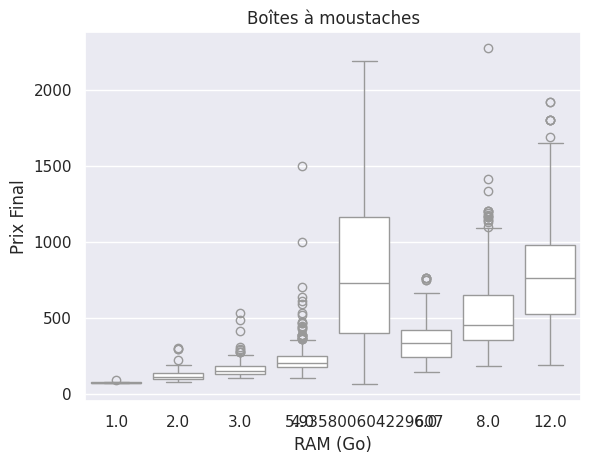

In [99]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set()

ax = sns.boxplot(x="RAM", y="Final Price", data=df, color='white')
plt.xlabel('RAM (Go)')
plt.ylabel('Prix Final')
plt.title('Boîtes à moustaches')
plt.show()

Le boxplot montre une tendance générale à l'augmentation des prix finaux des appareils avec l'augmentation de la quantité de RAM. Les appareils avec plus de RAM tendent à être plus chers et ont une plus grande variabilité dans les prix, ce qui pourrait refléter des variations dans d'autres caractéristiques ou des marques différentes. Les valeurs aberrantes, notamment pour les RAM de 6 Go et plus, montrent que certains appareils sont beaucoup plus chers que la moyenne de leur catégorie, ce qui peut indiquer des appareils haut de gamme ou avec des fonctionnalités supplémentaires

In [100]:

df = df.rename(columns={'Final Price': 'FinalPrice'})

anova_variete = smf.ols('FinalPrice~RAM', data=df).fit()
sm.stats.anova_lm(anova_variete)

,df,sum_sq,mean_sq,F,PR(>F)
RAM,1.0,4.912548e+07,4.912548e+07,390.191181,8.023779e-79
Residual,1814.0,2.283845e+08,1.259011e+05,NaN,NaN


# Interpretation


Les résultats de l'ANOVA montrent que la quantité de RAM a un effet significatif sur le prix final des appareils :

Effet significatif de la RAM : La valeur F élevée (390.191181) et la valeur p extrêmement faible (8.023779e-79) indiquent que la quantité de RAM influence de manière significative le prix final des appareils. Variance expliquée par la RAM : La somme des carrés pour la RAM (4.912548e+07) par rapport à la somme des carrés des résidus (2.283845e+08) montre que bien que la RAM explique une partie significative de la variance du prix final, une grande partie de la variance reste inexpliquée, suggérant que d'autres facteurs peuvent également influencer le prix final. En résumé, la RAM est un facteur important dans la détermination du prix final des appareils, mais il est probable que d'autres caractéristiques jouent également un rôle significatif.

In [101]:
anova_variete = smf.ols('FinalPrice~Storage', data=df).fit()
sm.stats.anova_lm(anova_variete)

,df,sum_sq,mean_sq,F,PR(>F)
Storage,1.0,1.344475e+08,1.344475e+08,1704.7637,2.740706e-263
Residual,1814.0,1.430625e+08,7.886576e+04,NaN,NaN


#Interpretation

La table ANOVA indique qu'il existe une relation significative entre la variable "Storage" et "FinalPrice", comme en témoigne la valeur extrêmement faible de p (2.740706e-263), ce qui signifie qu'il est hautement improbable d'observer une telle relation si l'effet de "Storage" était nul.

In [102]:
anova_variete = smf.ols('FinalPrice~Color', data=df).fit()
sm.stats.anova_lm(anova_variete)


,df,sum_sq,mean_sq,F,PR(>F)
Color,16.0,2.145738e+07,1.341086e+06,9.369962,9.330633e-23
Residual,1789.0,2.560526e+08,1.431261e+05,NaN,NaN


# Interprétation:

la variable "Color" a un effet significatif sur vos données, comme le montre la valeur p très faible (9.330633e-23), ce qui suggère que la couleur a une influence significative sur ce qui est analysé.

La statistique F (9.369962) est également relativement élevée, ce qui renforce l'idée que la variable "Color" a un effet significatif.

La ligne "Residual" représente l'erreur résiduelle, c'est-à-dire la variation dans les données qui n'est pas expliquée par la variable "Color".

In [103]:
anova_variete = smf.ols('FinalPrice~Free', data=df).fit()
sm.stats.anova_lm(anova_variete)

,df,sum_sq,mean_sq,F,PR(>F)
Free,1.0,3.298224e+05,329822.404450,2.146617,0.143059
Residual,1804.0,2.771802e+08,153647.539995,NaN,NaN


# Interprétation:
La valeur p associée à "Free" est de 0.143059, ce qui est plus élevé que les seuils conventionnels de 0.05 ou 0.01, suggérant qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle selon laquelle l'effet de "Free" est nul.

La statistique F est de 2.146617, ce qui est relativement faible par rapport aux exemples précédents. Cela indique que la variance expliquée par "Free" est légèrement plus grande que la variance résiduelle, mais pas de manière significative.

La ligne "Residual" représente l'erreur résiduelle, c'est-à-dire la variation dans les données qui n'est pas expliquée par la variable "Free".

En résumé, les données ne fournissent pas suffisamment de preuves pour affirmer que la variable "Free" a un effet significatif sur ce qui est analysé, du moins pas à un niveau de confiance conventionnel.

In [104]:
anova_variete = smf.ols('FinalPrice~Model', data=df).fit()
sm.stats.anova_lm(anova_variete)



,df,sum_sq,mean_sq,F,PR(>F)
Model,381.0,2.294009e+08,602101.997555,17.821843,0.0
Residual,1424.0,4.810912e+07,33784.496830,NaN,NaN


# Interprétation:
La ligne "Model" indique que le modèle dans son ensemble (c'est-à-dire toutes les variables prises ensemble) a un effet significatif sur les données. La valeur p (0.0) est extrêmement faible, suggérant que le modèle a un effet significatif.

La statistique F est de 17.821843, ce qui indique que la variance expliquée par le modèle est beaucoup plus grande que la variance résiduelle.

La ligne "Residual" représente l'erreur résiduelle, c'est-à-dire la variation dans les données qui n'est pas expliquée par le modèle.

En résumé, les résultats indiquent que le modèle dans son ensemble est significatif pour expliquer les données analysées. La valeur p de 0.0 indique une très forte confiance dans cette conclusion

In [105]:
anova_variete = smf.ols('FinalPrice~Brand', data=df).fit()
sm.stats.anova_lm(anova_variete)

,df,sum_sq,mean_sq,F,PR(>F)
Brand,36.0,7.968097e+07,2.213360e+06,19.792011,2.596777e-104
Residual,1769.0,1.978290e+08,1.118310e+05,NaN,NaN


# Interpretation

La variable "Brand" semble avoir un effet significatif sur les données, comme le montre la valeur p très faible (2.596777e-104). Cela suggère que la marque a une influence significative sur ce qui est analysé.

La statistique F (19.792011) est relativement élevée, ce qui renforce l'idée que la variable "Brand" a un effet significatif.

La ligne "Residual" représente l'erreur résiduelle, c'est-à-dire la variation dans les données qui n'est pas expliquée par la variable "Brand".

ANOVA à deux facteurs

In [106]:
anova_variete_phyto = smf.ols('FinalPrice~RAM*Storage*Model', data=df).fit()
sm.stats.anova_lm(anova_variete_phyto)

,df,sum_sq,mean_sq,F,PR(>F)
Model,381.0,2.294009e+08,6.021020e+05,30.303048,0.000000e+00
RAM,1.0,4.365205e+06,4.365205e+06,219.695385,8.416920e-46
RAM:Model,381.0,1.282443e+07,3.365992e+04,1.694062,1.673573e-11
Storage,1.0,6.201889e+06,6.201889e+06,312.133392,2.506429e-62
Storage:Model,381.0,1.054242e+07,2.767039e+04,1.392617,1.974843e-05
RAM:Storage,1.0,4.583781e+04,4.583781e+04,2.306960,1.290567e-01
RAM:Storage:Model,381.0,7.041001e+06,1.848032e+04,0.930092,8.029275e-01
Residual,1211.0,2.406179e+07,1.986935e+04,NaN,NaN


"Model" : Cette ligne indique que le modèle dans son ensemble a un effet significatif sur les données, avec une très faible valeur p (0.000000e+00).

"RAM" : Cela signifie que la variable "RAM" a un effet significatif sur les données, avec une valeur p très faible (8.416920e-46). Cela suggère que la quantité de RAM a une influence significative sur ce qui est analysé.

"RAM:Model" : Ceci représente l'interaction entre la variable "RAM" et le modèle. La valeur p (1.673573e-11) indique que cette interaction est significative.

"Storage" : Cela signifie que la variable "Storage" a un effet significatif sur les données, avec une valeur p très faible (2.506429e-62). Cela suggère que la capacité de stockage a une influence significative sur ce qui est analysé.

"Storage:Model" : Ceci représente l'interaction entre la variable "Storage" et le modèle. La valeur p (1.974843e-05) indique que cette interaction est significative.

"RAM:Storage" : Ceci représente l'interaction entre les variables "RAM" et "Storage". La valeur p (1.290567e-01) n'est pas inférieure au seuil conventionnel de 0.05, donc cette interaction n'est pas significative à ce niveau de confiance.

"RAM:Storage:Model" : Ceci représente l'interaction entre les variables "RAM", "Storage" et le modèle. La valeur p (8.029275e-01) est élevée, ce qui indique que cette interaction n'est pas significative.

"Residual" : Cette ligne représente l'erreur résiduelle, c'est-à-dire la variation dans les données qui n'est pas expliquée par le modèle.

En résumé, le modèle global ainsi que les variables "RAM" et "Storage" ont des effets significatifs sur les données, ainsi que certaines interactions entre ces variables et le modèle.

In [107]:
anova_variete_phyto = smf.ols('FinalPrice~Brand*Color*Free', data=df).fit()
sm.stats.anova_lm(anova_variete_phyto)

,df,sum_sq,mean_sq,F,PR(>F)
Brand,36.0,7.968097e+07,2.213360e+06,20.971016,9.648607e-109
Color,16.0,6.287524e+06,3.929702e+05,3.723292,8.473716e-07
Free,1.0,2.992944e+05,2.992944e+05,2.835737,9.238135e-02
Brand:Color,576.0,6.835885e+07,1.186786e+05,1.124449,4.133266e-02
Brand:Free,36.0,1.855024e+06,5.152843e+04,0.488219,9.955820e-01
Color:Free,16.0,3.192724e+06,1.995452e+05,1.890640,1.748916e-02
Brand:Color:Free,576.0,6.972746e+07,1.210546e+05,1.146961,2.118268e-02
Residual,1618.0,1.707698e+08,1.055438e+05,NaN,NaN


"Brand" : Cette ligne indique que la variable "Brand" a un effet significatif sur les données, avec une valeur p très faible (9.648607e-109).

"Color" : Cela signifie que la variable "Color" a un effet significatif sur les données, avec une valeur p très faible (8.473716e-07).

"Free" : Cette ligne indique que la variable "Free" n'a pas un effet significatif sur les données, car sa valeur p (9.238135e-02) est supérieure à 0.05.

"Brand:Color" : Ceci représente l'interaction entre les variables "Brand" et "Color". La valeur p (4.133266e-02) indique que cette interaction est significative.

"Brand:Free" et "Color:Free" : Ces lignes représentent les interactions entre les variables respectives ("Brand" et "Color") et "Free". Leurs valeurs p (9.955820e-01 et 1.748916e-02) montrent que ces interactions ne sont pas significatives, sauf pour "Color:Free".

"Brand:Color:Free" : Ceci représente l'interaction entre les trois variables ("Brand", "Color" et "Free"). La valeur p (2.118268e-02) indique que cette interaction est significative.

"Residual" : Cette ligne représente l'erreur résiduelle, c'est-à-dire la variation dans les données qui n'est pas expliquée par le modèle.

En résumé, les variables "Brand" et "Color" ont des effets significatifs sur les données, ainsi que certaines interactions entre ces variables. La variable "Free" n'a pas d'effet significatif sur les données, sauf lorsqu'elle interagit avec la variable "Color".

#ACP
**Question: Quelle est la structure sous-jacente des données ?**

L'ACP permet de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information.

# Préparation des données

In [108]:

df = pd.read_csv("smartphones.csv")
#Suppression des colonnes Color, Model, Brand, Smartphone,Free
df = df.drop(['Color', 'Model', 'Brand', 'Smartphone','Free'], axis=1)

df

# Remplacer les valeurs manquantes par la moyenne de la colonne respective
df['RAM'].fillna(df['RAM'].mean(), inplace=True)
df['Final Price'].fillna(df['Final Price'].mean(), inplace=True)
df['Storage'].fillna(df['Storage'].mean(), inplace=True)
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df)



# Application de ACP

Length of list_acp: 3
Length of explained_variance_ratio: 3


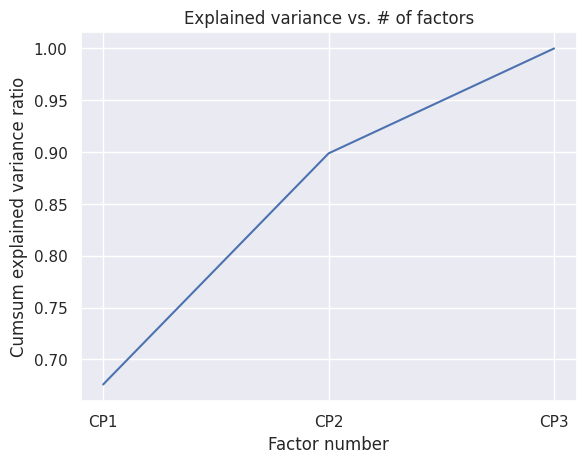

In [109]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()

#Coordonées dans le nouvel espace
coord = acp.fit_transform(Z)
import matplotlib.pyplot as plt#print(coord)
import matplotlib.pyplot as plt
import numpy as np

# Cumul de variance expliquée
list_acp = ["CP1", "CP2", "CP3"]
# Suppose que acp.explained_variance_ratio_ a plus de 8 éléments, sélectionnons les 8 premiers
explained_variance_ratio = acp.explained_variance_ratio_[:len(list_acp)]
print("Length of list_acp:", len(list_acp))
print("Length of explained_variance_ratio:", len(explained_variance_ratio))

plt.plot(list_acp, np.cumsum(explained_variance_ratio))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

# interpretation
On voit que les deux composants principeaux sont suffisant pour presenter nos variables car ils expliquent plus que 75% de la variance


**Quels sont les facteurs ou variables les plus importants ?**

L'ACP met en évidence les variables qui contribuent le plus à chaque composante principale.

In [110]:
# Calcul de la qualité de représentation des individus - COS2
di = np.sum(coord**2, axis=1)
cos2 = coord**2

# Assurez-vous que le nombre de colonnes dans la boucle est correct
num_cols = cos2.shape[1]  # Nombre de colonnes dans cos2

for j in range(num_cols):
    cos2[:, j] = cos2[:, j] / di

df_ctr_12 = pd.DataFrame({'id': df.index, 'COS2_1': cos2[:, 0], 'COS2_2': cos2[:, 1]})
df_ctr_12


,id,COS2_1,COS2_2
0,0,0.124485,0.333249
1,1,0.757414,0.210532
2,2,0.795506,0.108624
3,3,0.629694,0.246125
4,4,0.796095,0.089947
...,...,...,...
1811,1811,0.946954,0.048678
1812,1812,0.792410,0.125909
1813,1813,0.764292,0.198024
1814,1814,0.964504,0.035375


# Interpretation
COS2_1 et COS2_2 montrent combien de la variance des variables ou des individus est expliquée par les deux premiers axes d'une analyse factorielle. Elles permettent d'évaluer la qualité de la représentation de chaque variable ou individu sur ces axes ,
Par exemple, pour l'individu 0, 0.122361 de la variance est expliquée par le premier axe et 0.308673 par le deuxième axe.

In [111]:
ctr = coord**2
# Calcul des contributions
for j in range(ctr.shape[1]):  # Utilise ctr.shape[1] pour obtenir le nombre de colonnes
    ctr[:,j] = ctr[:,j] / np.sum(ctr[:,j])

# Création du DataFrame avec les contributions
df_ctr_cp1cp2 = pd.DataFrame({'id': df.index, 'CTR_1': ctr[:,0], 'CTR_2': ctr[:,1]})
df_ctr_cp1cp2

,id,CTR_1,CTR_2
0,0,0.000058,0.000474
1,1,0.000222,0.000187
2,2,0.000307,0.000127
3,3,0.000059,0.000070
4,4,0.003088,0.001057
...,...,...,...
1811,1811,0.000415,0.000065
1812,1812,0.000288,0.000139
1813,1813,0.000230,0.000181
1814,1814,0.000457,0.000051


# Interpretation
les colonnes CTR_1 et CTR_2 montrent les contributions des individus aux deux premiers axes factoriels, mettant en évidence ceux qui influencent le plus la formation de ces axes et offrant un aperçu de la structure des données dans l'espace factoriel.
Par exemple, l'individu 0 a une contribution de 0.000055 (ou 0.0055%) à Dim1 et de 0.000436 (ou 0.0436%) à Dim2.

**Y a-t-il des regroupements ou des patterns dans les données ?**

En projetant les données sur les premières composantes principales, l'ACP peut révéler des clusters ou des tendances naturelles dans les données, facilitant ainsi la détection de structures cachées.

In [112]:
acp.explained_variance_

array([2.02850456, 0.66932263, 0.30382571])

In [113]:
#!pip install mlxtend
from mlxtend.plotting import plot_pca_correlation_graph

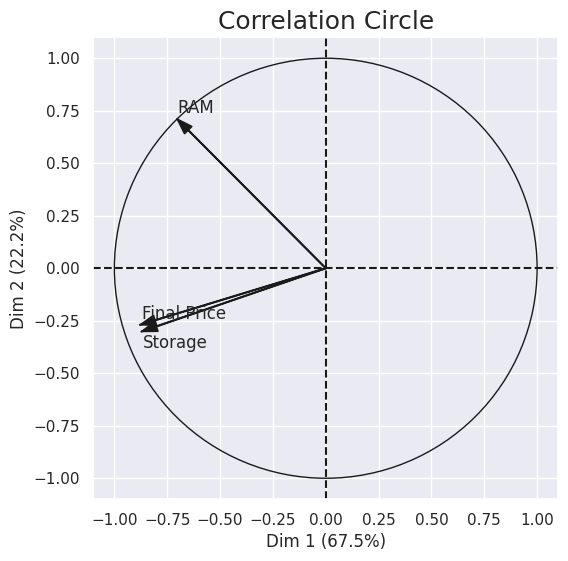

In [114]:
figure, correlation_matrix = plot_pca_correlation_graph(Z,
                                                        df.columns.values,
                                                        dimensions=(1,2),
                                                        figure_axis_size=6)

#Interpretation
On observe que Dim1 explique 68% de la variance et Dim2 explique 21,8% de notre jeu de données. L'axe des abscisses montre la corrélation entre les variables Final Price, Storage et RAM avec le premier composant. De même, l'axe des ordonnées montre la corrélation entre les variables Final Price, Storage et RAM avec le deuxième composant.

Pour la variable Final Price, il y a une corrélation négative de -0,25 avec Dim2 et de -0,80 avec Dim1, ce qui indique qu'elle est bien représentée par Dim1. Pour la variable Storage, il y a également une corrélation négative de -0,30 avec Dim2 et de -0,80 avec Dim1, ce qui montre qu'elle est également bien représentée par Dim1.

En revanche, pour la variable RAM, il y a une corrélation positive de 0,70 avec Dim2 et une corrélation négative de -0,65 avec Dim1, ce qui indique qu'elle est mieux représentée par Dim2 que par Dim1.

On constate que l'angle entre Final Price et Storage est proche de 0, ce qui signifie qu'il y a une corrélation parfaite entre ces deux variables.

# AFC


In [115]:
%pip install fanalysis

In [116]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv('smartphones.csv')
data

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


In [118]:
data=data.set_index("Brand")
data

,Smartphone,Model,RAM,Storage,Color,Free,Final Price
Brand,,,,,,,
Realme,Realme C55 8/256GB Sunshower Libre,C55,8.0,256.0,Yellow,Yes,231.60
Samsung,Samsung Galaxy M23 5G 4/128GB Azul Libre,Galaxy M23,4.0,128.0,Blue,Yes,279.00
Motorola,Motorola Moto G13 4/128GB Azul Lavanda Libre,Moto G13,4.0,128.0,Blue,Yes,179.01
Xiaomi,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
Nothing,Nothing Phone (2) 12/512GB Blanco Libre,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...
Xiaomi,Xiaomi Redmi Note 8 4/64GB Azul Libre,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
Xiaomi,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
Xiaomi,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Redmi Note 9,4.0,128.0,White,Yes,269.00


In [119]:
# On crée une instale de la classe CA en passant les étiquettes de lignes et les colonnes
afc=CA(row_labels=df.index.values,col_labels=df.columns.values,stats=True)

In [120]:
print(df.columns)

Index(['RAM', 'Storage', 'Final Price'], dtype='object')


In [121]:
afc.fit(df.values)

CA(col_labels=array(['RAM', 'Storage', 'Final Price'], dtype=object),
   row_labels=array([   0,    1,    2, ..., 1813, 1814, 1815]))

# Analyse graphique:
# Graphique des départements (profil ligne)

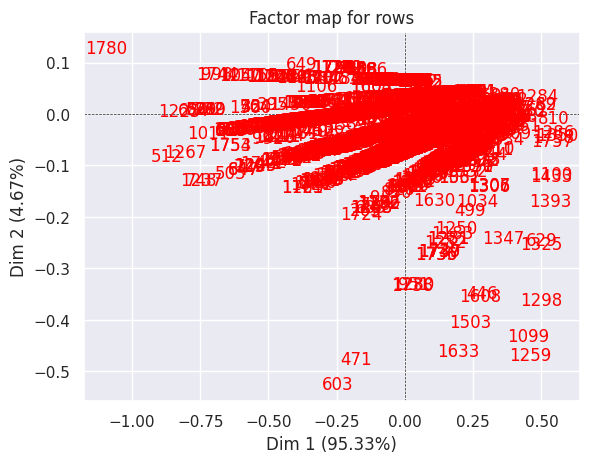

In [122]:
afc.mapping_row(num_x_axis=1,num_y_axis=2)

# Graphique des candidats (profil colonne)

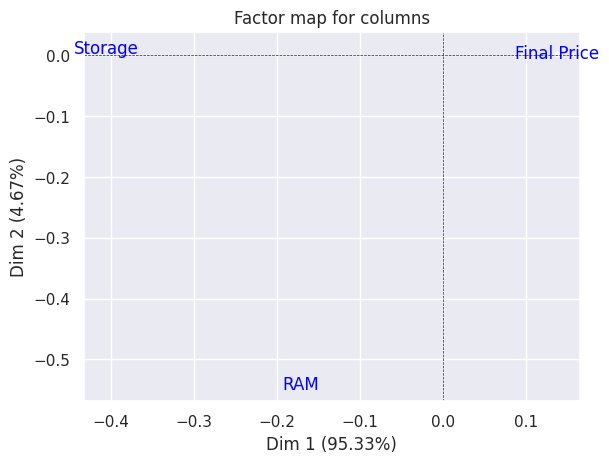

In [123]:
afc.mapping_col(num_x_axis=1,num_y_axis=2)

# Graphique superposition des profils lignes et colonnes

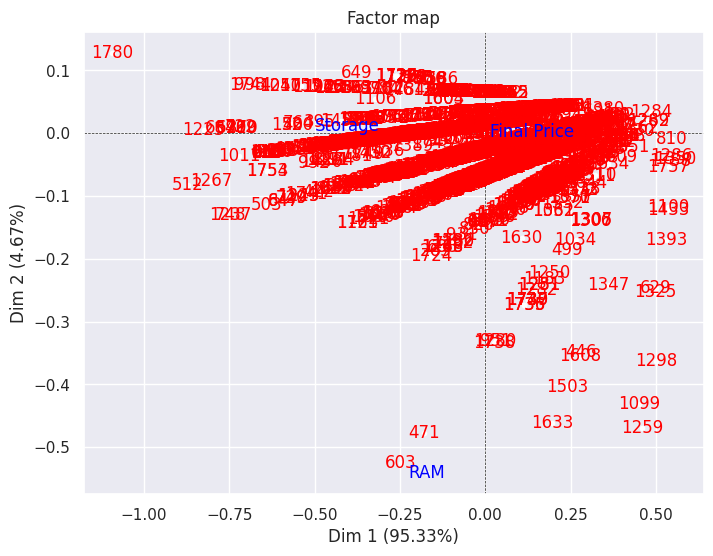

In [124]:
afc.mapping(1, 2, figsize=(8, 6))

# AFD:

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv('smartphones.csv')
df = pd.DataFrame(data)
df = df.dropna()
# Clean column names
df.columns = df.columns.str.replace(' ', '_').str.replace('.', '').str.lower()

# Convert RAM and Storage to numeric
df['ram'] = pd.to_numeric(df['ram'], errors='coerce')
df['storage'] = pd.to_numeric(df['storage'], errors='coerce')

# Convert Final Price to numeric
df['final_price'] = pd.to_numeric(df['final_price'], errors='coerce')

# Display cleaned DataFrame
print(df)

                                            smartphone     brand  \
0                   Realme C55 8/256GB Sunshower Libre    Realme   
1             Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung   
2         Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola   
3             Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi   
4              Nothing Phone (2) 12/512GB Blanco Libre   Nothing   
...                                                ...       ...   
1811             Xiaomi Redmi Note 8 4/64GB Azul Libre    Xiaomi   
1812   Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre    Xiaomi   
1813          Xiaomi Redmi Note 9 4/128GB Blanco Libre    Xiaomi   
1814   Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre    Xiaomi   
1815  Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre    Xiaomi   

               model   ram  storage   color free  final_price  
0                C55   8.0    256.0  Yellow  Yes       231.60  
1         Galaxy M23   4.0    128.0    Blue  Yes       

In [127]:
X = df[['ram', 'storage', 'final_price']]
y = df['brand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = lda.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Alcatel       0.00      0.00      0.00         1
        Asus       0.00      0.00      0.00         1
   Blackview       0.00      0.00      0.00         8
         CAT       0.00      0.00      0.00         4
   Crosscall       0.00      0.00      0.00         1
       Cubot       0.00      0.00      0.00        12
      Google       0.00      0.00      0.00         2
      Hammer       0.00      0.00      0.00         5
       Honor       0.00      0.00      0.00         7
      Huawei       0.00      0.00      0.00        16
      Lenovo       0.00      0.00      0.00         1
      Maxcom       0.00      0.00      0.00         1
   Microsoft       0.00      0.00      0.00         0
    Motorola       0.00      0.00      0.00        17
       Nokia       0.00      0.00      0.00         3
     Nothing       0.00      0.00      0.00         1
        OPPO       0.17      0.08      0.11        24
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

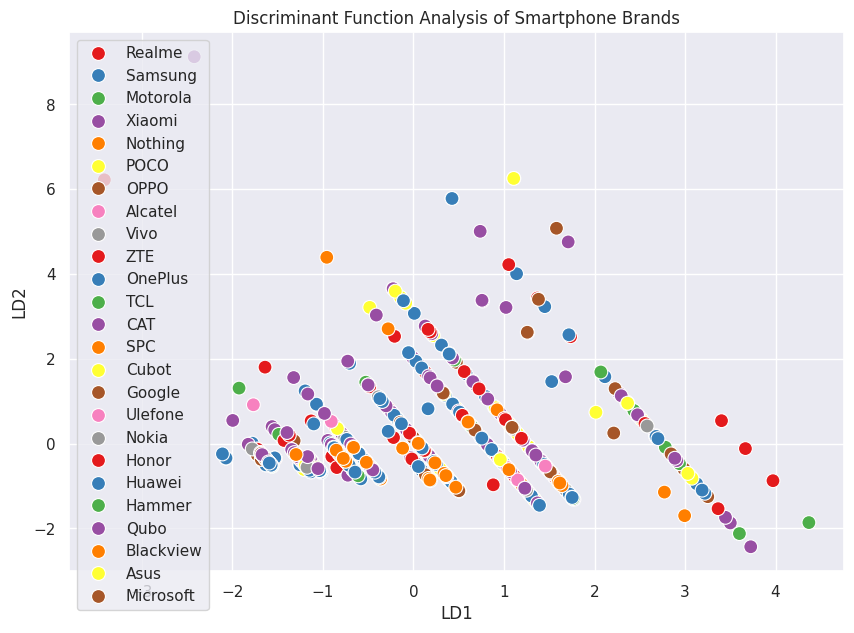

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

X_lda = lda.transform(X)

# Create a DataFrame for the LDA components
lda_df = pd.DataFrame(X_lda, columns=[f'LD{i+1}' for i in range(X_lda.shape[1])])
lda_df['Brand'] = y

# Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='Brand', palette='Set1', s=100)
plt.title('Discriminant Function Analysis of Smartphone Brands')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Interprétation:
Dim 1 (46,62%)
La première dimension explique 46,62% de la variance totale des données. Cela signifie que la première dimension capture la relation la plus importante entre les marques. Dans ce cas, la première dimension semble être liée au prix, car les marques avec des prix plus élevés (par exemple, "400+ USD") se situent sur le côté positif de l'axe des x, tandis que les marques avec des prix plus bas (par exemple, "0-150 USD") se situent sur le côté négatif de l'axe des x.

Dim 2 (33,38%)
La deuxième dimension explique 33,38% de la variance totale des données. Cela signifie que la deuxième dimension capture la deuxième relation la plus importante entre les marques. Dans ce cas, la deuxième dimension semble être liée au système d'exploitation, car les marques avec des systèmes d'exploitation Android se situent sur le côté positif de l'axe des y, tandis que les marques avec des systèmes d'exploitation iOS se situent sur le côté négatif de l'axe des y.

Interprétation de marques spécifiques

Realme, Xiaomi, Poco, SPC, Cubot, Ulefone: Ces marques sont situées sur le côté négatif de l'axe des x et tendent à être moins chères. Leur position sur l'axe des y varie, suggérant une certaine diversité de systèmes d'exploitation.

Samsung, Motorola, Alcatel: Ces marques sont situées autour du centre du graphique, suggérant des prix moyens et un mélange de systèmes d'exploitation.

OnePlus: Cette marque est située sur le côté positif des deux axes, suggérant des smartphones Android haut de gamme.

Apple: Bien qu'elle ne soit pas explicitement mentionnée, elle se situe probablement sur le côté positif de l'axe des x et sur le côté négatif de l'axe des y, indiquant des smartphones haut de gamme avec un système d'exploitation iOS

#CART

la méthode CART aide à classifier des données en catégories distinctes, visualiser le processus de décision de manière claire et structurée.


In [29]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [30]:
# Afficher les premières lignes du dataset pour visualiser les données
print(df.head())
# Remplacer les valeurs manquantes par la moyenne de la colonne respective
df['RAM'].fillna(df['RAM'].mean(), inplace=True)
df['Final Price'].fillna(df['Final Price'].mean(), inplace=True)
df['Storage'].fillna(df['Storage'].mean(), inplace=True)


# Sélectionner les colonnes de caractéristiques et la colonne cible
X = df[['RAM', 'Storage']]
y = df['Final Price']

# Afficher les premières lignes des caractéristiques et de la cible pour vérification
print(X.head())
print(y.head())

    RAM  Storage  Final Price
0   8.0    256.0       231.60
1   4.0    128.0       279.00
2   4.0    128.0       179.01
3   6.0    128.0       279.99
4  12.0    512.0       799.00
    RAM  Storage
0   8.0    256.0
1   4.0    128.0
2   4.0    128.0
3   6.0    128.0
4  12.0    512.0
0    231.60
1    279.00
2    179.01
3    279.99
4    799.00
Name: Final Price, dtype: float64


In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Définir les colonnes numériques

numeric_features = ['RAM', 'Storage']

# Créer un transformateur de colonnes pour appliquer les imputations et OneHotEncoder aux colonnes catégorielles
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Remplacer les valeurs manquantes par la moyenne
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Remplacer les valeurs manquantes par 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Appliquer OneHotEncoder
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),

    ])

# Créer un pipeline pour prétraiter les données et entraîner le modèle
reg_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])



# Entraîner le modèle
reg_tree.fit(X_train, y_train)

# Évaluer le modèle
score = reg_tree.score(X_test, y_test)
print(f'R^2 score: {score:.4f}')


R^2 score: 0.6607


Number of features: 2
Feature names: ['RAM', 'Storage']


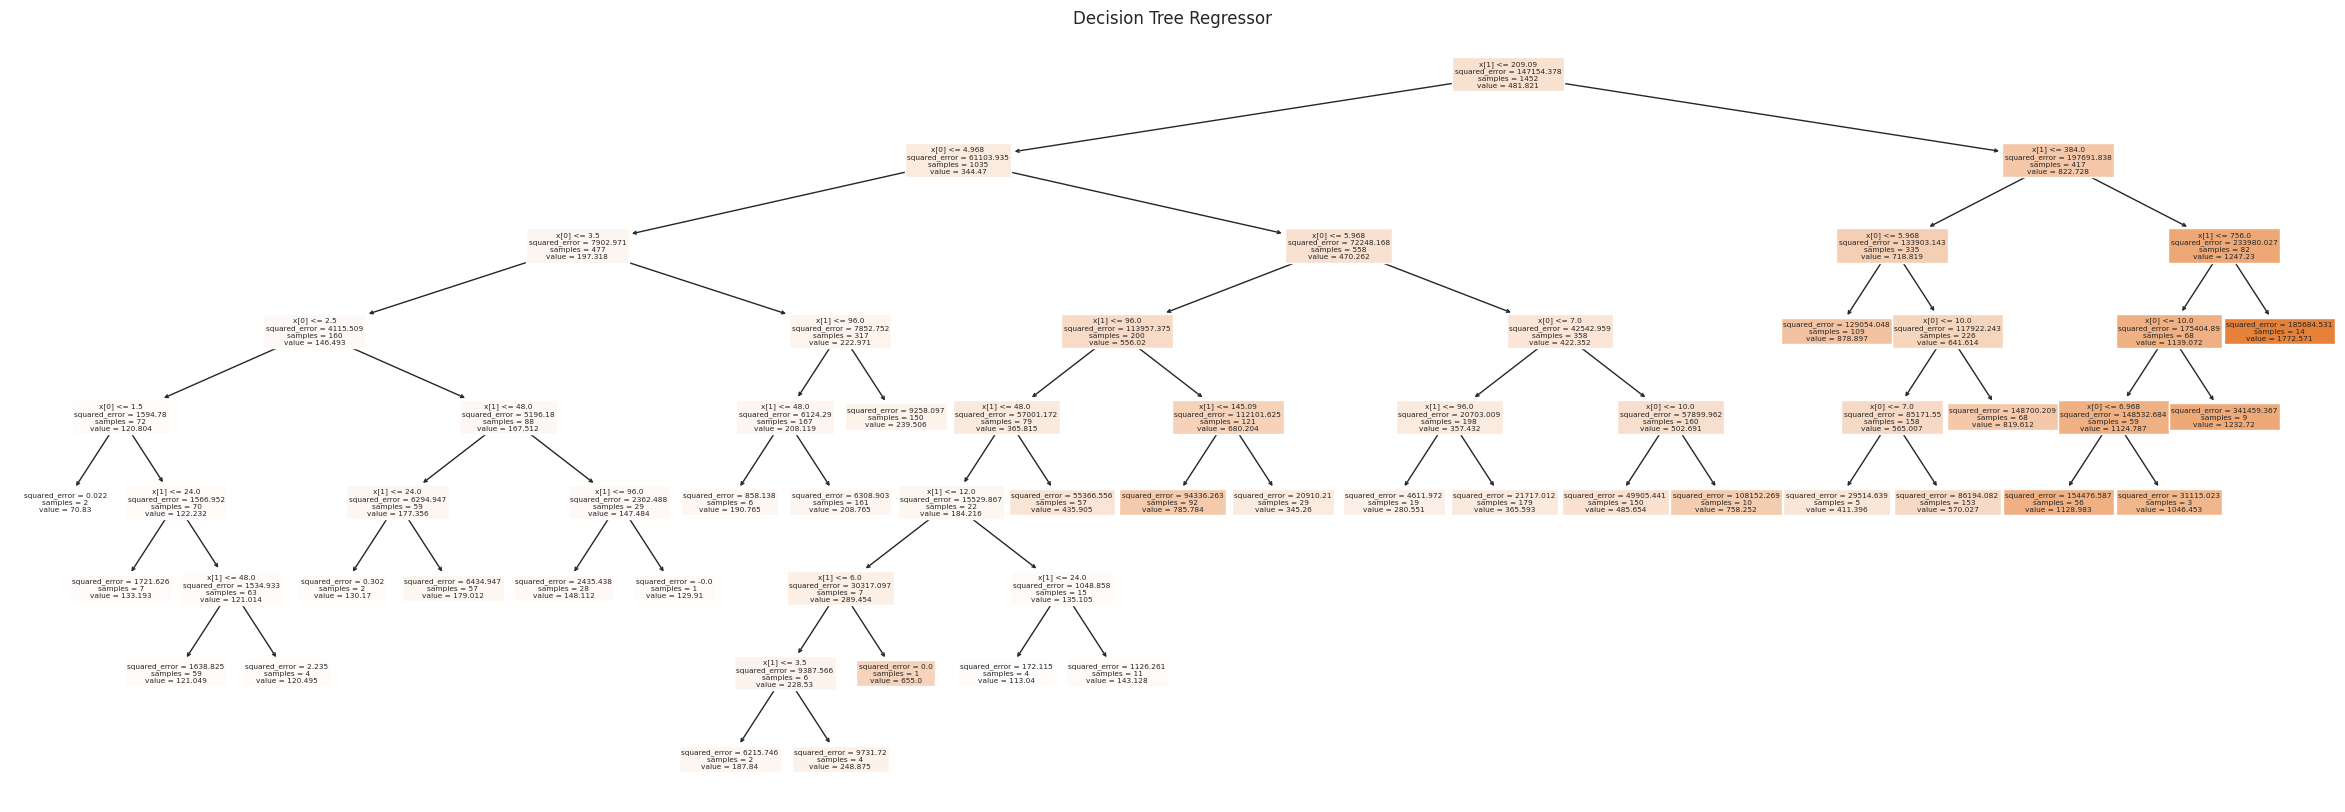

In [33]:

print("Number of features:", len(X.columns))
print("Feature names:", X.columns.tolist())

tree_model = reg_tree.named_steps['regressor']

plt.figure(figsize=(30, 10))
plot_tree(tree_model, filled=True)
plt.title("Decision Tree Regressor")
plt.show()
